In the beginning: check which instances in each bag are likely to be anomalous, and only then align them!

In [1]:
versionname = "Original"
original = True
al_strategy = "entropy"
load = True

In [2]:
## Imports

import numpy as np
import math
import matplotlib.pyplot as plt
import torch

torch.manual_seed(1302)
np.random.seed(1302)

In [3]:
k = 30
nbags = 10
bag_contfactor = .4
seed = 1302

In [4]:
## Construct dataset
# 15 bags
# 35 instances/bag
import sys
from PUMILADmain.create_ds_2 import gen_data



bags, bags_labels, X_inst, y_inst = gen_data(k = k, nbags = nbags, bag_contfactor = bag_contfactor, seed = seed)
X_inst = X_inst[:,:2]
newb = {}
for k, v in bags.items():
    newb[k] = v[:,:2]
bags = newb
originalbags = bags

In [5]:
import matplotlib
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve
def pplot(bags, probs, weights, dataBag, name):

    norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

    fig, ax = plt.subplots( nrows=1, ncols=1 ,figsize=(16,9)) 
    domain = np.zeros((0,2))
    prs = np.zeros((0))
    w = np.zeros((0))
    fl1 = True
    fl2 = True

    for bag in range(len(bags)):
        domain = np.concatenate((domain,bags[bag]))
        prs = np.concatenate((prs, probs[bag]))
        w = np.concatenate((w, weights[bag]))

        anomalies = []
        normals = []
        wn = []
        wa = []
        prsa = []
        prsn = []

        domain = bags[bag]
        for idx in range(len(domain)):
            if dataBag.isAnomaly(bag, idx):
                anomalies.append(domain[idx])
                prsa.append(probs[bag][idx])
                wa.append(weights[bag][idx])
            else:
                normals.append(domain[idx])
                prsn.append(probs[bag][idx])
                wn.append(weights[bag][idx])

        normals = np.asarray(normals)
        anomalies = np.asarray(anomalies)
        wn = np.asarray(wn)
        wa = np.asarray(wa)
        if (len(normals)>0):
            if fl1:
                z = ax.scatter(normals[:,0], normals[:,1], marker='o', norm=norm, c=prsn, cmap="coolwarm", s=250-200*wn, edgecolors='k', label = "Real normal")#, c= 'b')
                fl1 = False
            else:
                z = ax.scatter(normals[:,0], normals[:,1], marker='o', norm=norm, c=prsn, cmap="coolwarm", s=250-200*wn, edgecolors='k')#, c= 'b')
        if (len(anomalies)>0):
            if fl2:
                ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k', label = "Real anomaly")#,c= 'b') 
                fl2 = False
            else:
                ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k')#,c= 'b')  
    
    #ax.scatter(instance[0], instance[1],c='lime',label = "Selected instance",s=400, edgecolors='k')


    scoreroc = roc_auc_score(np.rint(y_inst), prs)
    # Data to plot precision - recall curve
    precision, recall, _ = precision_recall_curve(np.rint(y_inst), prs)
    # Use AUC function to calculate the area under the curve of precision recall curve
    scorepr = auc(recall, precision)

    plt.title(name, fontsize = 16)
    print("roc", scoreroc)
    print("pr", scorepr)

    
    textstr = "ROC AUC = {:.10f}\nPR AUC = {:.10f}".format(scoreroc, scorepr)
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='right', bbox=props)

    
    cbar = fig.colorbar(z,ax= ax, label ="higher score = more positive")
    tick_font_size = 14
    cbar.ax.tick_params(labelsize=tick_font_size)
    plt.rcParams.update({'font.size': 14})
    ax.legend(loc = "lower right", fontsize= 14)

    #fig.savefig('colorimg2/iteration'+str(t).zfill(3)+'.png',bbox_inches='tight')
    plt.show()
    plt.close(fig)

    ############################
    # Figure 2: seperate plots #
    ############################
    if len(bags) > 1:
        fig, ax = plt.subplots( nrows=3, ncols=4 ,figsize=(16,9)) 
        domain = np.zeros((0,2))
        prs = np.zeros((0))
        w = np.zeros((0))
        fl1 = True
        fl2 = True

        for bag in range(len(bags)):

            
        
            row = int(np.floor_divide(bag, 4))
            column = int(np.remainder(bag, 4))
            axis = ax[row, column]

            domain = np.concatenate((domain,bags[bag]))
            prs = np.concatenate((prs, probs[bag]))
            w = np.concatenate((w, weights[bag]))

            anomalies = []
            normals = []
            wn = []
            wa = []
            prsa = []
            prsn = []

            domain = bags[bag]
            for idx in range(len(domain)):
                if dataBag.isAnomaly(bag, idx):
                    anomalies.append(domain[idx])
                    prsa.append(probs[bag][idx])
                    wa.append(weights[bag][idx])
                else:
                    normals.append(domain[idx])
                    prsn.append(probs[bag][idx])
                    wn.append(weights[bag][idx])

            normals = np.asarray(normals)
            anomalies = np.asarray(anomalies)
            wn = np.asarray(wn)
            wa = np.asarray(wa)
            if (len(normals)>0):
                if fl1:
                    z = axis.scatter(normals[:,0], normals[:,1], marker='o', norm=norm, c=prsn, cmap="coolwarm", s=250-200*wn, edgecolors='k', label = "Real normal")#, c= 'b')
                    fl1 = False
                else:
                    z = axis.scatter(normals[:,0], normals[:,1], marker='o', norm=norm, c=prsn, cmap="coolwarm", s=250-200*wn, edgecolors='k')#, c= 'b')
            if (len(anomalies)>0):
                if fl2:
                    axis.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k', label = "Real anomaly")#,c= 'b') 
                    fl2 = False
                else:
                    axis.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k')#,c= 'b')  
        
            #ax.scatter(instance[0], instance[1],c='lime',label = "Selected instance",s=400, edgecolors='k')

        cbar = fig.colorbar(z,ax= ax, label ="higher score = more positive")
        tick_font_size = 14
        cbar.ax.tick_params(labelsize=tick_font_size)

        plt.title(name, fontsize = 16)
        print("roc", scoreroc)
        print("pr", scorepr)
        
        
        plt.rcParams.update({'font.size': 14})

        #fig.savefig('colorimg2/iteration'+str(t).zfill(3)+'.png',bbox_inches='tight')
        plt.show()
        plt.close(fig)



    return None

In [6]:
D = bags
bags = np.array(list(D.values()))
print(list(y_inst))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [7]:
import sys
sys.path.insert(1, '../')
from dataBag import DataBag
from rewardInfo import RewardInfo

dataBag = DataBag(bags, bags_labels, X_inst, y_inst)
rewardInfo = RewardInfo(len(bags_labels))

clrs = ['b','g','r','c','m','k','y', 'lime','deeppink','aqua','yellow','gray','darkorange','saddlebrown','salmon']

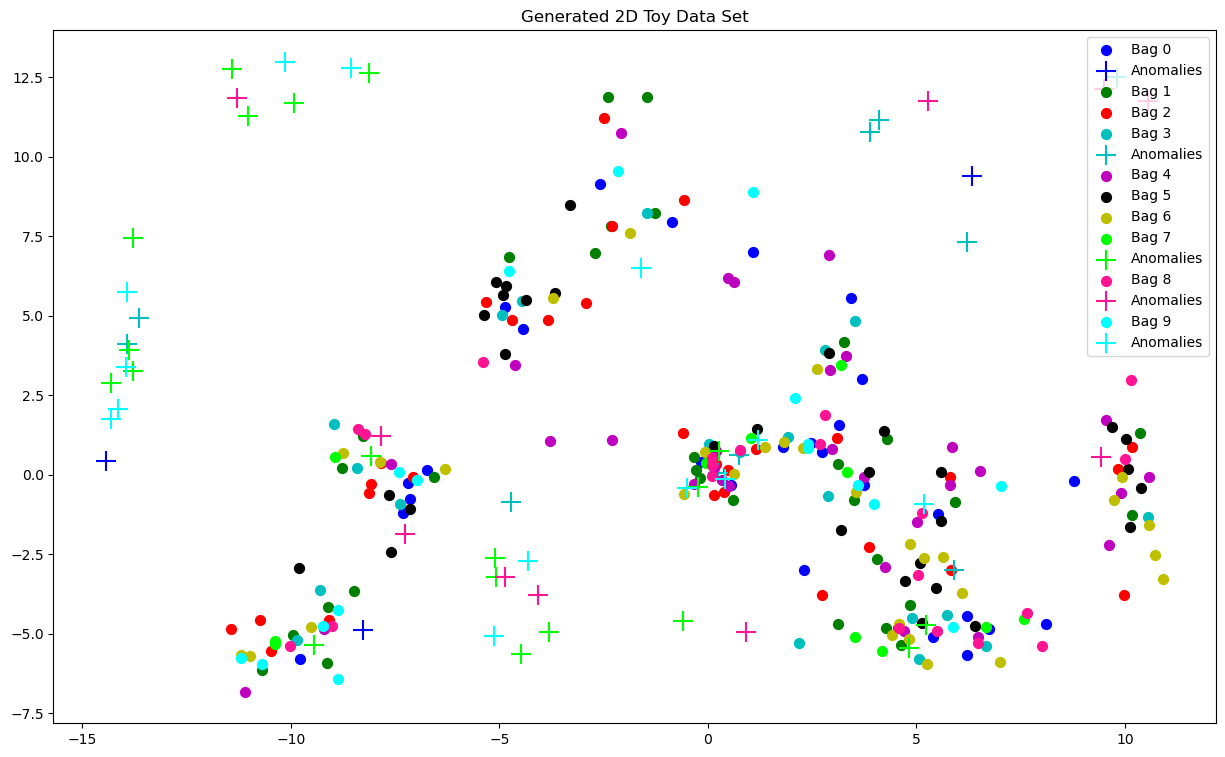

In [8]:
## Create toy data set

from itertools import cycle
cycol = cycle(clrs)

fig, ax = plt.subplots( nrows=1, ncols=1, figsize = (15,9) )  # create figure & 1 axis

for bag in range(len(bags)):
    domain = bags[bag]
    anomalies = []
    normals = []
    D[bag] = np.asarray(domain.tolist())

    for idx in range(len(domain)):
        if dataBag.isAnomaly(bag, idx):
            anomalies.append(domain[idx])
        else:
            normals.append(domain[idx])

    anomalies = np.asarray(anomalies)
    normals = np.asarray(normals)
    
    c=next(cycol)
    if (len(normals)>0):
        ax.scatter(normals[:,0], normals[:,1], marker='.', c=c, s=200, label = "Bag "+str(bag))#, c= 'b')
    if (len(anomalies)>0):
        ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', c=c, s=200, label = "Anomalies")#,c= 'b')

'''for bag in range(len(bags)):
    domain = bags[bag]
    if (len(domain)>0):
        ax.scatter(domain[:,0], domain[:,1], c=next(cycol))'''
        

plt.title('Generated 2D Toy Data Set')
plt.legend()
plt.savefig('img/original.png',bbox_inches='tight')
plt.show()
plt.close(fig)


In [9]:
from alignflow_master.dataReplacer import DataReplacer

dataReplacer = DataReplacer(nbags)
x = {}
for key, v in D.items():
    x[key] = v[:,:2].copy()
dataReplacer.setInitData(x)

In [10]:
from data import Data
from methods import MABMethod

## Create 2 domains
training_data = Data(nbags)
print(nbags)
print(D)
training_data.set_domains_and_labels(D)
originaldata = D
query_budget =10# nbags*k#30# 30*10
alba = MABMethod(mab="rotting-swa", query_budget=query_budget, verbose=True, rewardInfo=rewardInfo , al_strategy = al_strategy)


10
{0: array([[  1.80082652,   0.86782827],
       [  2.73458323,   0.72535352],
       [  2.47287238,   0.98133658],
       [  1.07480599,   6.98904979],
       [ -0.86018144,   7.95423439],
       [ -2.58226139,   9.13808889],
       [  8.7809824 ,  -0.19160427],
       [  6.20419672,  -5.67560935],
       [  2.30506527,  -3.00447568],
       [  5.50835403,  -1.22334598],
       [  3.69288724,   3.01844114],
       [  3.74831349,  -0.34088255],
       [  3.13832457,   1.55272667],
       [  3.42284996,   5.5579491 ],
       [ -7.14445743,  -0.76912231],
       [ -7.31361045,  -1.22049981],
       [ -7.19592617,  -0.26830489],
       [ -6.74552078,   0.16068801],
       [ -9.77156931,  -5.81005648],
       [ -8.2686177 ,  -4.88138265],
       [  0.546927  ,  -0.33805723],
       [ -0.17199672,   0.38400785],
       [  6.73698853,  -4.84567558],
       [  8.11821087,  -4.70963093],
       [  6.21672784,  -4.45297454],
       [  5.40293904,  -5.10651503],
       [ -4.86870391,   5.27827

In [11]:
labeledPos = {}
labeledNeg = {}
for bag in range(len(bags)):
    labeledNeg[bag] = []
    labeledPos[bag] = []
performance = []

import transfer_learning_seperateArms as tl
clsf = tl.get_transfer_classifier(
        "none", "anomaly"
    )  
clsf.apply_transfer(training_data)
clsf.fit_all(training_data, ignore_unchanged=False)
probs = clsf.predict(training_data, True)

none


In [12]:
import os
import pathlib
try:
    os.remove(os.path.join(pathlib.Path().parent.resolve(), "alignflow_master", "ckpts", "normalaligner", "best.pth.tar"))
except Exception as exc:
    print("No model found to remove")

In [13]:
from alignflow_master.train_copyFullDataset import main

dataReplacer.setData(x)
print(dataReplacer.getWeights())
aligner = main(dataReplacer, y_inst, load)
D = dataReplacer.getLatent()
weights = dataReplacer.getWeights()
bags = np.array(list(D.values()))

{0: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 1: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 2: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 3: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 4: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 5: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 6: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

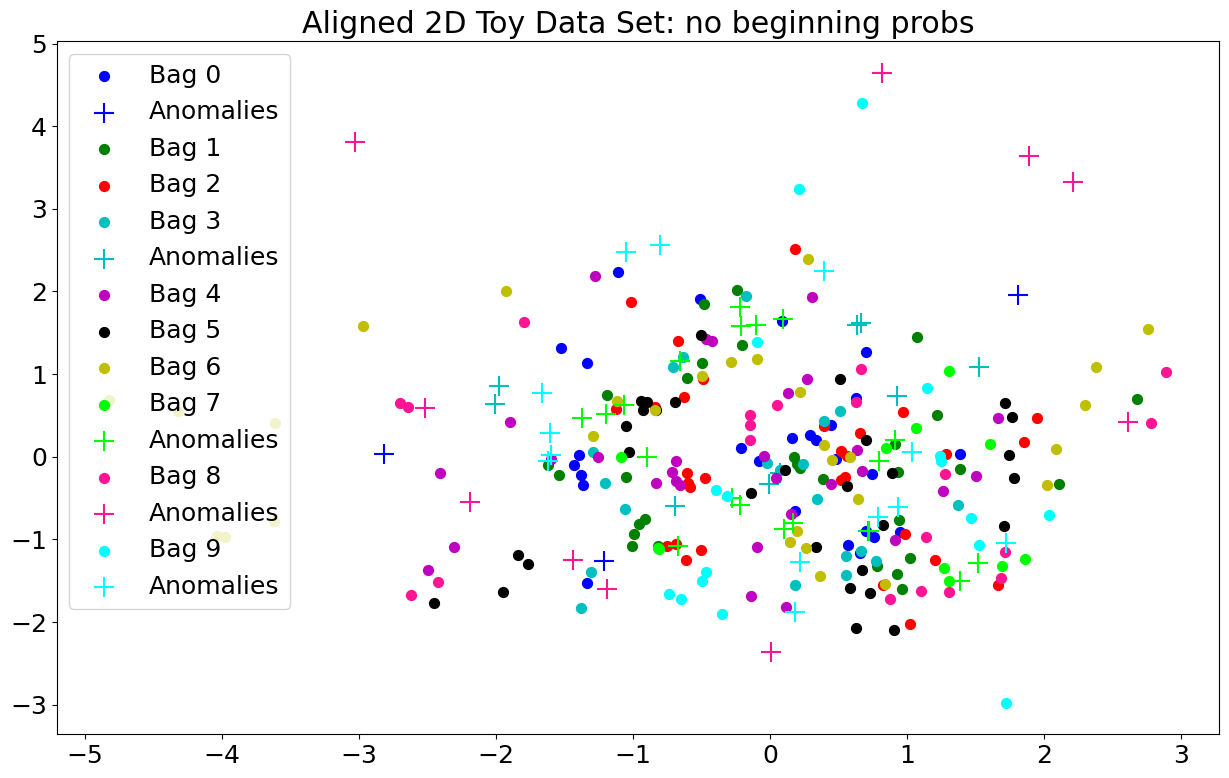

In [14]:
from itertools import cycle
cycol = cycle(clrs)

fig, ax = plt.subplots( nrows=1, ncols=1, figsize = (15,9) )  # create figure & 1 axis

for bag in range(len(bags)):
    domain = bags[bag]
    anomalies = []
    normals = []
    D[bag] = np.asarray(domain.tolist())

    for idx in range(len(domain)):
        if dataBag.isAnomaly(bag, idx):
            anomalies.append(domain[idx])
        else:
            normals.append(domain[idx])

    anomalies = np.asarray(anomalies)
    normals = np.asarray(normals)
            
    c=next(cycol)
    if (len(normals)>0):
        ax.scatter(normals[:,0], normals[:,1], marker='.', c=c, s=200, label = "Bag "+str(bag))#, c= 'b')
    if (len(anomalies)>0):
        ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', c=c, s=200, label = "Anomalies")#,c= 'b')   

        '''for bag in range(len(bags)):
            domain = bags[bag]
            if (len(domain)>0):
                ax.scatter(domain[:,0], domain[:,1], c=next(cycol))'''
                

plt.title('Aligned 2D Toy Data Set: no beginning probs')
plt.legend()
plt.show()
plt.close(fig)

In [15]:
from collections import OrderedDict
from transfer_learning import get_transfer_classifier




def predict(test_data, probabilities=False):
        classifier = get_transfer_classifier("none", "anomaly")  # could be none
        classifier.apply_transfer(test_data)
        classifier.fit_all(test_data, ignore_unchanged=False)



        predictions = OrderedDict({})
        X = np.zeros((0,2))
        nl = np.zeros((1))
        for key in test_data.keys_:
            X = np.concatenate((X,test_data.get_domain(key)))
            nl = np.append(nl, len(list(X)))
        prs = classifier.predict(0, X, probabilities)
        for key in test_data.keys_:
            predictions[key] = prs[int(nl[key]):int(nl[key+1])]

        return predictions

none


C:\Users\vanma\AppData\Local\Temp\ipykernel_17456\964757266.py:49: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k', label = "Real anomaly")#,c= 'b')
C:\Users\vanma\AppData\Local\Temp\ipykernel_17456\964757266.py:52: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k')#,c= 'b')


roc 0.5971799628942486
pr 0.2803770016572753


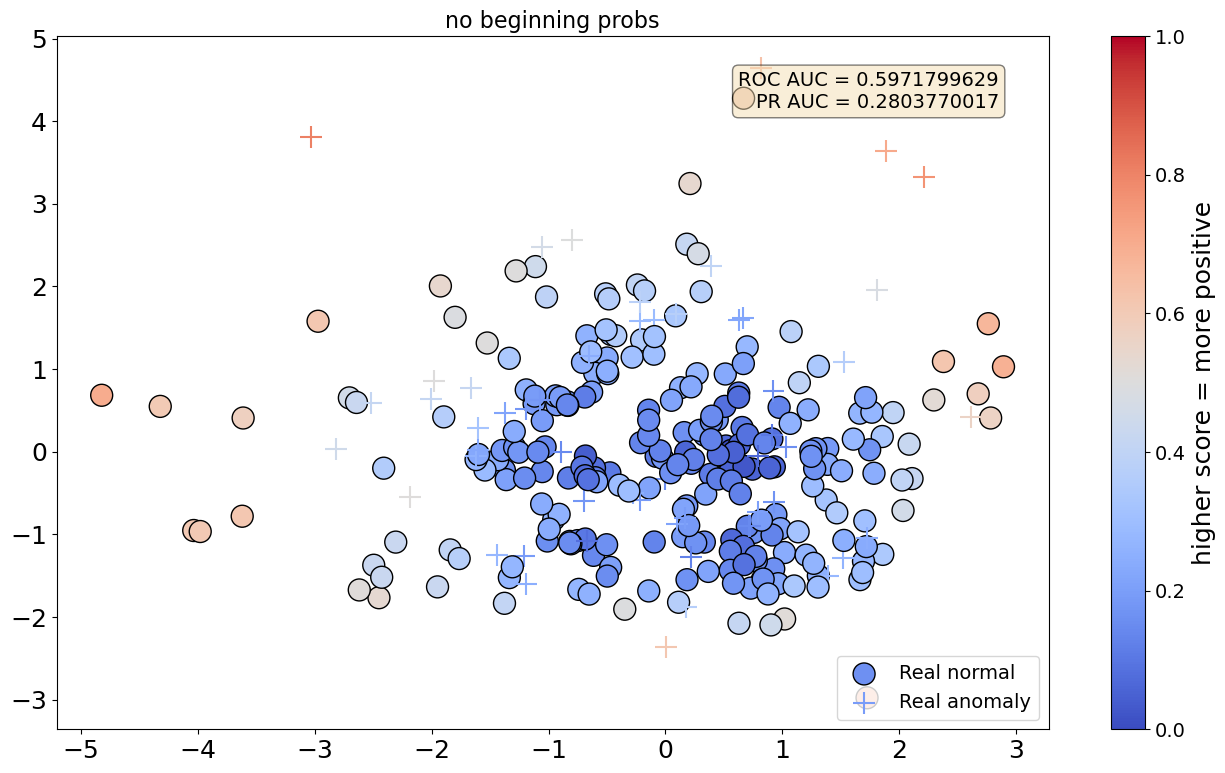

C:\Users\vanma\AppData\Local\Temp\ipykernel_17456\964757266.py:141: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axis.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k', label = "Real anomaly")#,c= 'b')
C:\Users\vanma\AppData\Local\Temp\ipykernel_17456\964757266.py:144: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axis.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k')#,c= 'b')


roc 0.5971799628942486
pr 0.2803770016572753


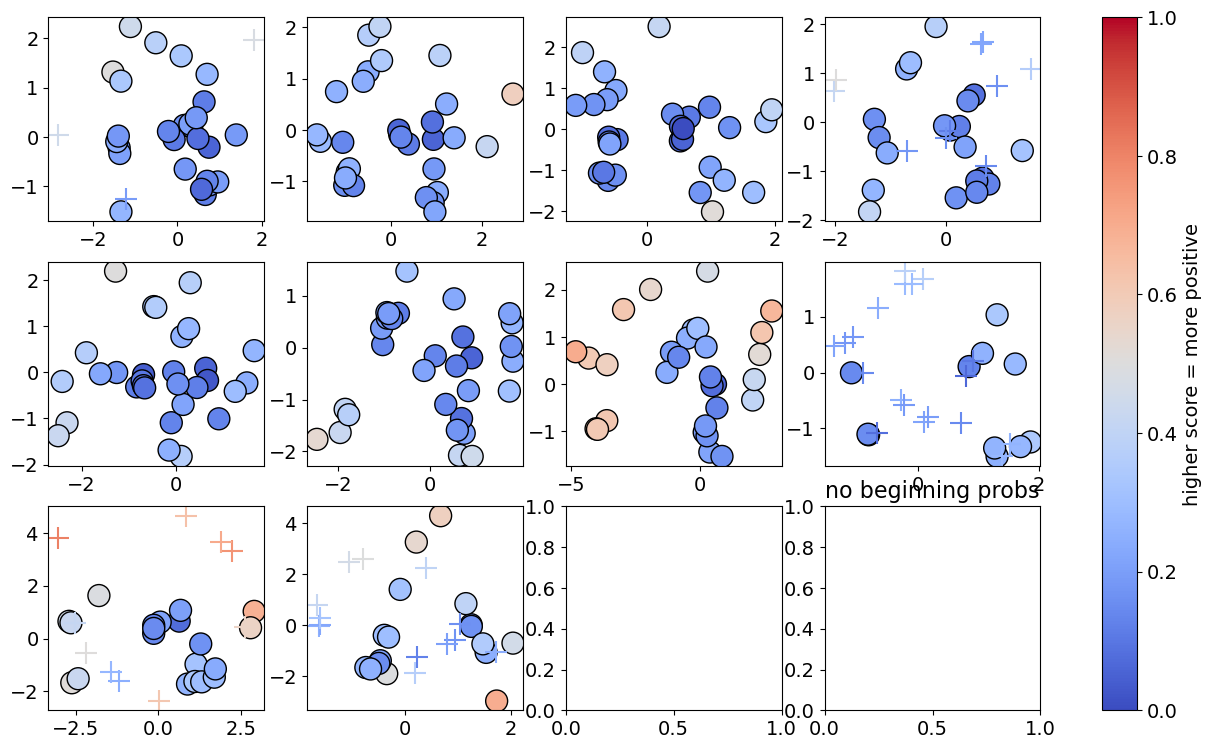

In [16]:

newtr = Data(nbags)
newtr.set_domains_and_labels(D)
pplot(bags, probs = predict(newtr, True), weights = weights, dataBag=dataBag, name = "no beginning probs")

In [17]:

os.remove(os.path.join(pathlib.Path().parent.resolve(), "alignflow_master", "ckpts", "normalaligner", "best.pth.tar"))

Add min max normalization to the probabiltiies!

In [18]:
def predictBegin(test_data):
        import transfer_learning_seperateArms as tl
        clsf = tl.get_transfer_classifier(
                "none", "anomaly"
            )  
        clsf.apply_transfer(test_data)
        clsf.fit_all(test_data, ignore_unchanged=False)
        probs = clsf.predict(test_data, True)

        
        minim, maxim = np.Inf, -np.Inf
        for k,v in probs.items():
            m = np.min(v) 
            if m < minim:
                 minim = m
            m = np.max(v)
            if m > maxim:
                 maxim = m
                 
        predictions = {}
        allprobs = np.zeros((0))
        for k,v in probs.items():
            predictions[k] = (v-minim)/(maxim-minim)
            allprobs = np.concatenate((allprobs, predictions[k]))

        CONT_FACTOR = .1
        LENGTH = np.shape(allprobs)[0]
        thr_idx = LENGTH - int(np.ceil(LENGTH*CONT_FACTOR))
        idxs = np.argsort(allprobs)
        threshold = np.sum(allprobs[idxs[thr_idx-1:thr_idx+1]])/2
        
        summm = 0
        newpredictions = {}
        for k,v in predictions.items():
            probabs = v/threshold
            newpredictions[k] = 1-np.power(2, -probabs)
            summm += np.sum(newpredictions[k]>=.5)

        return newpredictions

In [19]:
from alignflow_master.train_copyFullDataset import main

newprobs = predictBegin(training_data)

print(newprobs)

dataReplacer.setData(x)
dataReplacer.setWeights(newprobs)
aligner = main(dataReplacer, y_inst, load)
D = dataReplacer.getLatent()
weights = dataReplacer.getWeights()
bags = np.array(list(D.values()))

none
{0: array([0.08483011, 0.04589299, 0.06159901, 0.3980613 , 0.48987896,
       0.54821969, 0.40535373, 0.37789226, 0.29249239, 0.2349509 ,
       0.30036075, 0.02471595, 0.21753901, 0.25389141, 0.17255379,
       0.23547432, 0.07809776, 0.18948591, 0.61398829, 0.384281  ,
       0.09997181, 0.14290006, 0.33374438, 0.47172934, 0.30532381,
       0.32691081, 0.39927602, 0.44379172, 0.48354182, 0.53581912]), 1: array([0.13050667, 0.4913886 , 0.35285662, 0.38678237, 0.3795888 ,
       0.48858609, 0.54400234, 0.52327102, 0.25173601, 0.09380915,
       0.35814813, 0.05953684, 0.41134109, 0.27050321, 0.14654134,
       0.29196562, 0.6412462 , 0.26350734, 0.31717728, 0.40306408,
       0.41507728, 0.19852451, 0.05677333, 0.12978465, 0.07236575,
       0.2507019 , 0.14480079, 0.18038345, 0.25448702, 0.46984513]), 2: array([0.20840797, 0.25692222, 0.33933174, 0.42653035, 0.40019227,
       0.55258373, 0.37254098, 0.48953171, 0.47642279, 0.22469267,
       0.36318136, 0.39045151, 0.4265306 , 

KeyboardInterrupt: 

C:\Users\vanma\AppData\Local\Temp\ipykernel_15884\964757266.py:49: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k', label = "Real anomaly")#,c= 'b')
C:\Users\vanma\AppData\Local\Temp\ipykernel_15884\964757266.py:52: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k')#,c= 'b')


roc 0.6306493506493507
pr 0.26472256058566174


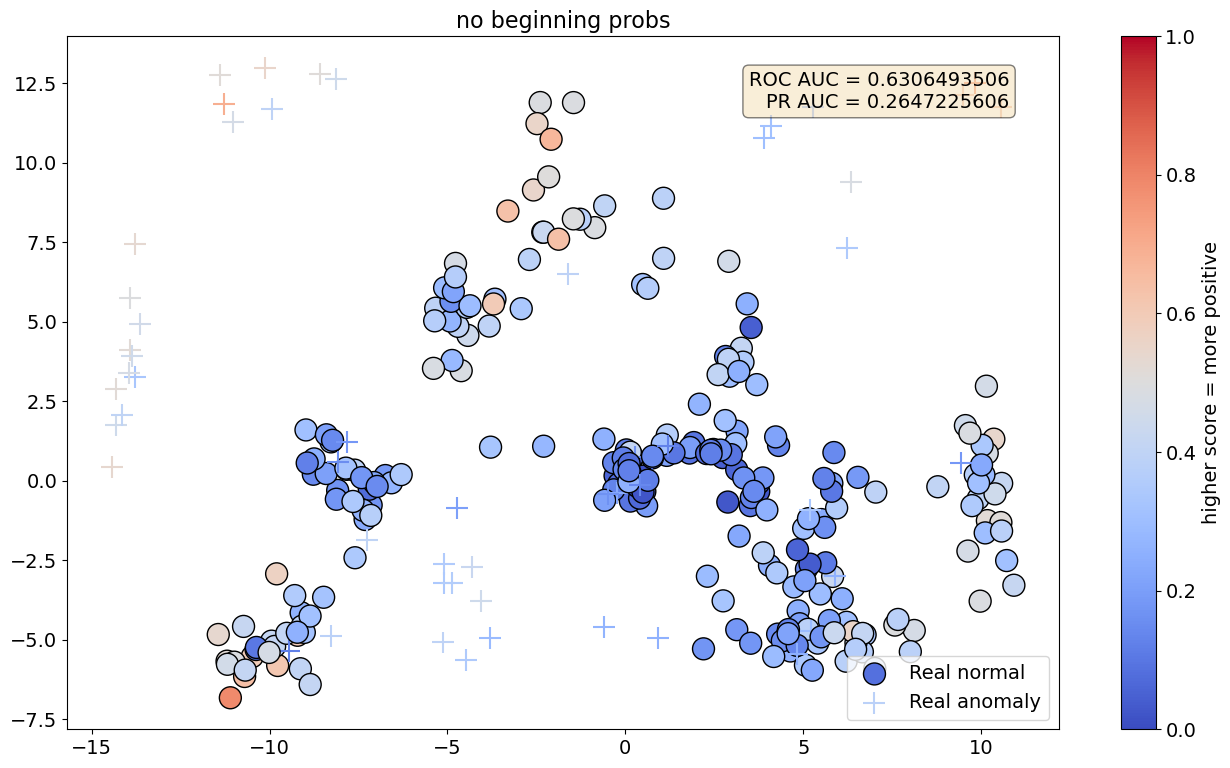

C:\Users\vanma\AppData\Local\Temp\ipykernel_15884\964757266.py:141: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axis.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k', label = "Real anomaly")#,c= 'b')
C:\Users\vanma\AppData\Local\Temp\ipykernel_15884\964757266.py:144: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axis.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k')#,c= 'b')


roc 0.6306493506493507
pr 0.26472256058566174


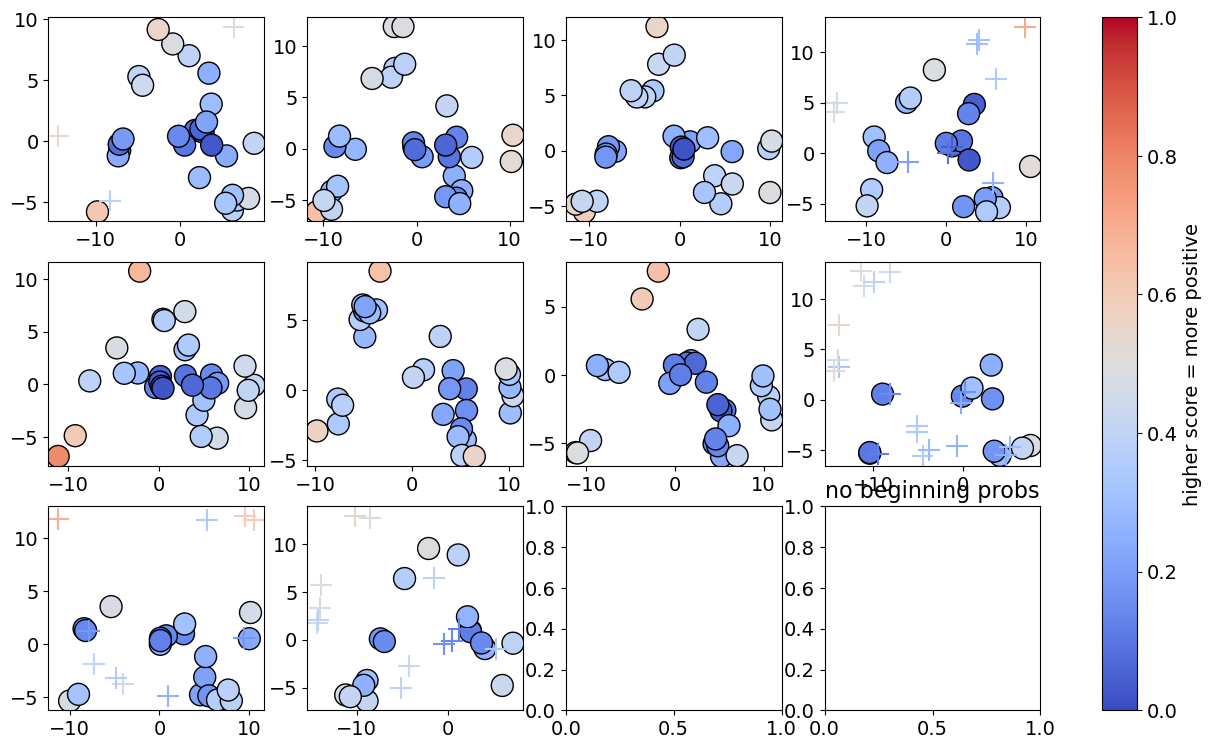

In [ ]:
ww = {}
for k, v in weights.items():
    ww[k] = np.zeros_like(v)

pplot(originalbags, probs = weights, weights = ww, dataBag=dataBag, name = "no beginning probs")

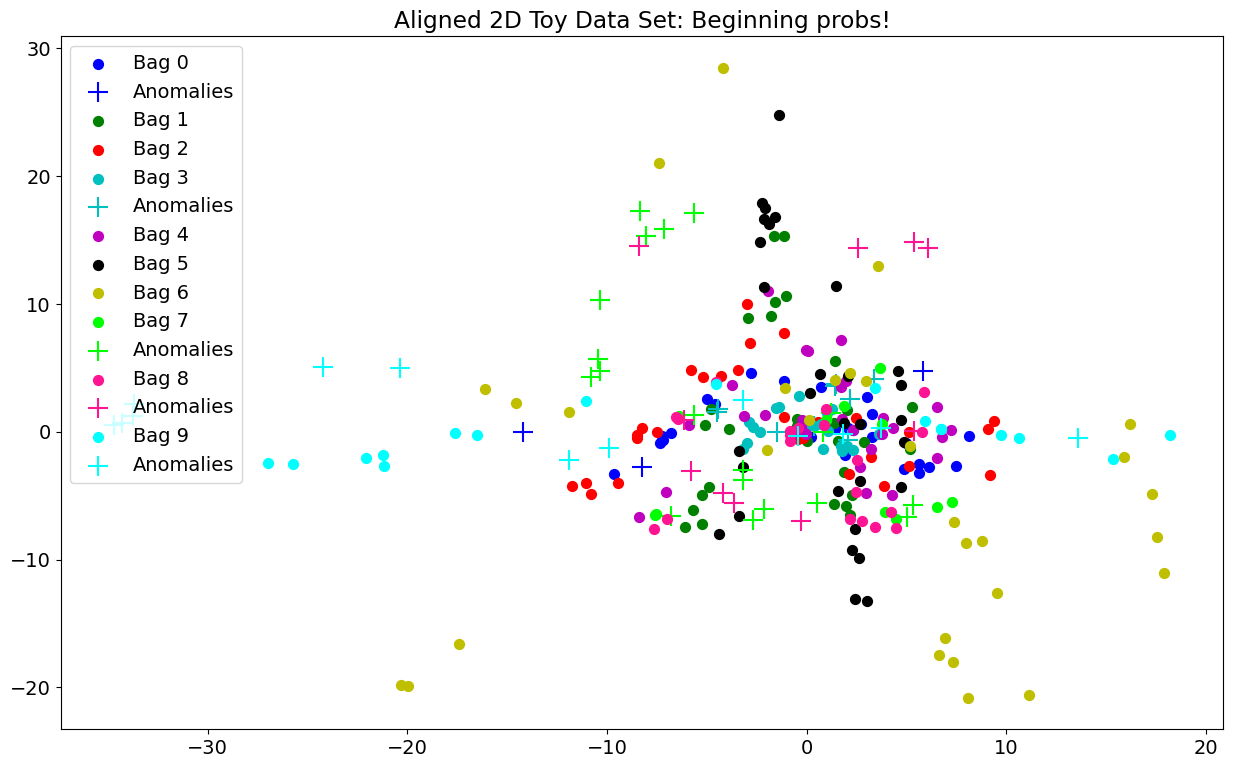

In [ ]:
from itertools import cycle
cycol = cycle(clrs)

fig, ax = plt.subplots( nrows=1, ncols=1, figsize = (15,9) )  # create figure & 1 axis

for bag in range(len(bags)):
    domain = bags[bag]
    anomalies = []
    normals = []
    D[bag] = np.asarray(domain.tolist())

    for idx in range(len(domain)):
        if dataBag.isAnomaly(bag, idx):
            anomalies.append(domain[idx])
        else:
            normals.append(domain[idx])

    anomalies = np.asarray(anomalies)
    normals = np.asarray(normals)
            
    c=next(cycol)
    if (len(normals)>0):
        ax.scatter(normals[:,0], normals[:,1], marker='.', c=c, s=200, label = "Bag "+str(bag))#, c= 'b')
    if (len(anomalies)>0):
        ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', c=c, s=200, label = "Anomalies")#,c= 'b')   

        '''for bag in range(len(bags)):
            domain = bags[bag]
            if (len(domain)>0):
                ax.scatter(domain[:,0], domain[:,1], c=next(cycol))'''
                

plt.title('Aligned 2D Toy Data Set: Beginning probs!')
plt.legend()
plt.show()
plt.close(fig)

none


C:\Users\vanma\AppData\Local\Temp\ipykernel_15884\964757266.py:49: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k', label = "Real anomaly")#,c= 'b')
C:\Users\vanma\AppData\Local\Temp\ipykernel_15884\964757266.py:52: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k')#,c= 'b')


roc 0.5774397031539888
pr 0.21960411894204113


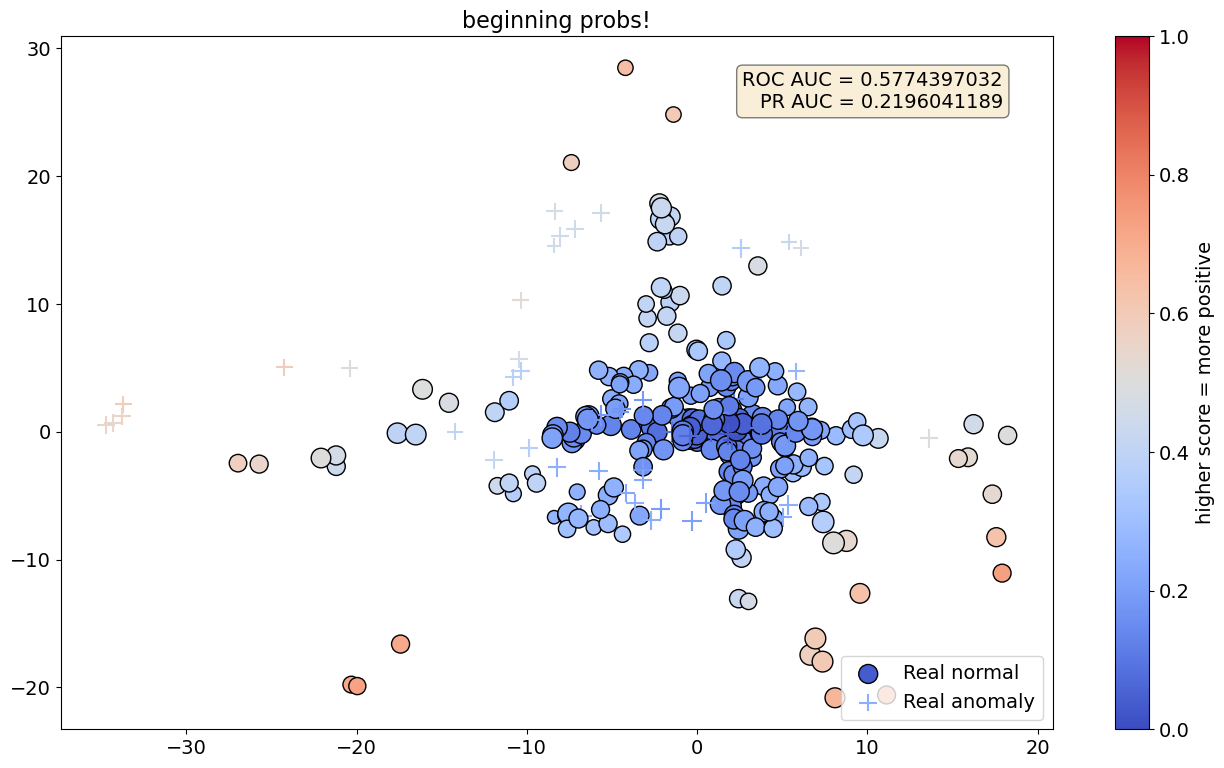

C:\Users\vanma\AppData\Local\Temp\ipykernel_15884\964757266.py:141: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axis.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k', label = "Real anomaly")#,c= 'b')
C:\Users\vanma\AppData\Local\Temp\ipykernel_15884\964757266.py:144: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axis.scatter(anomalies[:,0], anomalies[:,1],  marker='+', norm=norm, c=prsa, cmap="coolwarm", s=250-200*wa, edgecolors='k')#,c= 'b')


roc 0.5774397031539888
pr 0.21960411894204113


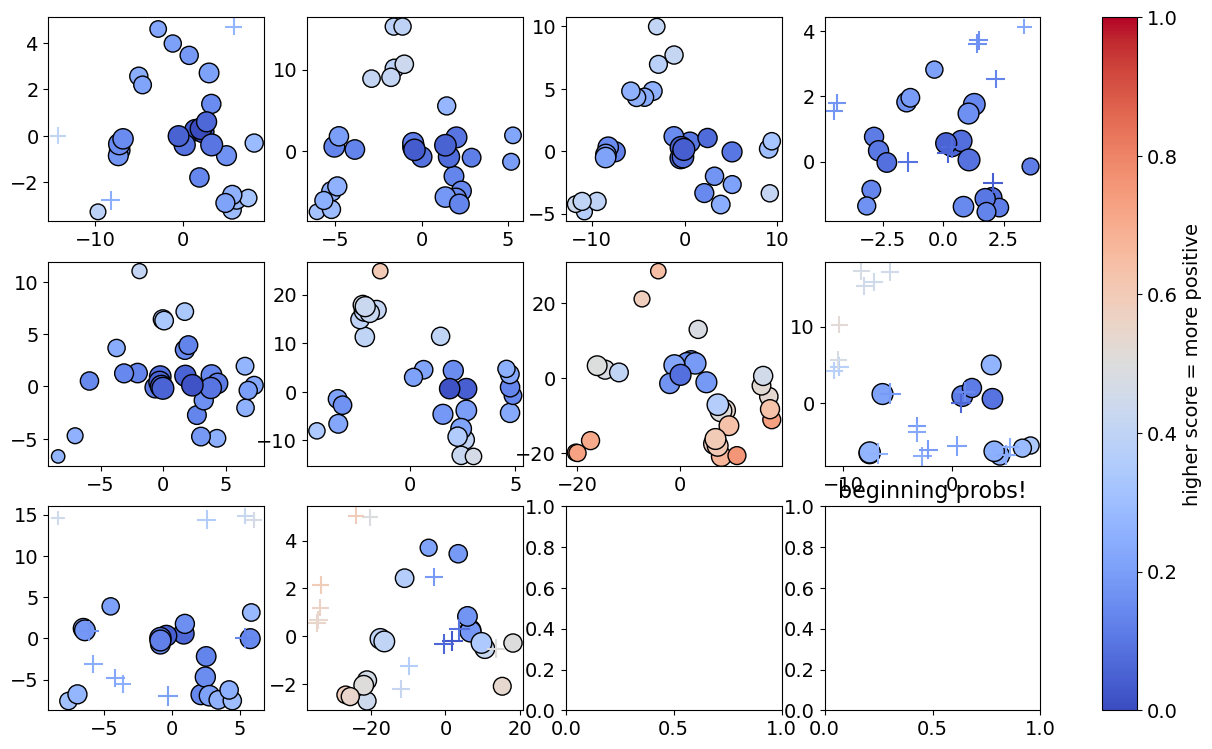

In [ ]:
newtr = Data(nbags)
newtr.set_domains_and_labels(D)
pplot(bags, probs = predict(newtr, True), weights = weights, dataBag=dataBag, name = "beginning probs!")